# air-temperature-svd

## Homework 7, Problem 2



---

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# SVD function from scipy
from scipy.linalg import svd

# we'll use scipy's IO library and datetime to read .mat files
import scipy.io as sio 
import datetime as dt

---
### Optional:

We can use the [geopandas](https://geopandas.org/) python package to plot our data with a map of the watershed.

Since we don't have geopandas installed on our JupyterHub by default, the first time you run this notebook, you'll need to install the geopandas into our python envrionment.

**Run the cell below once.** Uncomment it now, so that it reads `!pip install geopandas`, and run it. It will install geopandas on your JupyterHub. You shouldn't need to re-run it next time you open this notebook, so it's best to comment it out again when it completes.

When it is complete and you've commented it back out, restart the kernel by going to *Kernel* > *Researt Kernel*.

In [2]:
#!pip install geopandas

To help us make some maps, we are going to use geopandas to load this geojson file that has polyons for the US states from the census bureau.

In [3]:
# for plotting map figures and working with geospatial data, see installation step above
import geopandas as gpd 

In [4]:
watershed = gpd.read_file('../data/North_Fork_American_River_CA_18020128.json')

To plot:

In [5]:
# plot the watershed shapefile
#watershed.plot(linestyle='-', edgecolor='lightgrey', color='lightgrey')

***
## Problem 1:
#### **Load iButton air temperature data**
Unpack the mat file into numpy arrays, format dates to python datetimes following the method outlined [here](https://sociograph.blogspot.com/2011/04/how-to-avoid-gotcha-when-converting.html).

In [6]:
# load the ibutton data
data = sio.loadmat('../data/iButtons_2008-2010.mat')

# convert matlab format dates to python datetimes
datenums = data['TIME'][:,0]
dates = [dt.datetime.fromordinal(int(d)) + dt.timedelta(days=d%1) - dt.timedelta(days = 366) for d in datenums]

# Unpack the rest of the data
SITE_NAMES = [name[0][0] for name in data['SITE_NAMES']]
SITE_LATS = data['SITE_LATS'][:,0]
SITE_LONS = data['SITE_LONS'][:,0]
SITE_ELEVS = data['SITE_ELEVS'][:,0]
AIR_TEMPERATURE = data['AIR_TEMPERATURE']
AIR_TEMPERATURE_ZEROMEAN = data['AIR_TEMPERATURE_ZEROMEAN']

nt = data['nt'][0][0] # size in the t dimension
nx = data['nx'][0][0] # size in the x dimension (number of sites)

#### **Plot a timseries for a single site**
Note: use plt.xlim to set x axis limits to "zoom in" to a smaller time period

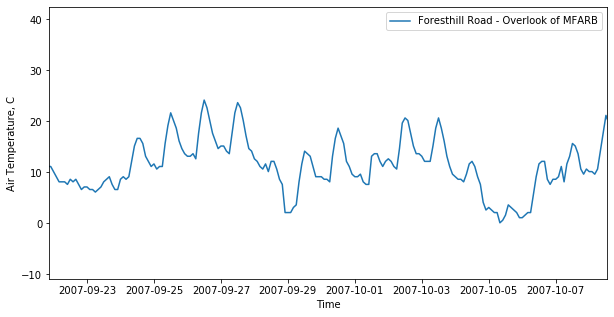

In [7]:
site = 0 # plot the first site of 21

plt.figure(figsize=(10,5))
plt.plot(dates,AIR_TEMPERATURE[:,site],label=SITE_NAMES[site])
plt.legend(loc='best')
plt.ylabel('Air Temperature, C')
plt.xlabel('Time');

# use xlim to set x axis limits to zoom in
# comment xlim out to plot the entire timeseries
plt.xlim((dates[100], dates[500])); 


#### **Decompose the entire dataset using SVD**

In [8]:
[U,S,V] = svd(AIR_TEMPERATURE_ZEROMEAN, full_matrices=False)

Plot the first leading pattern of spatial weights (EOF) against latitude and longitude on a map.

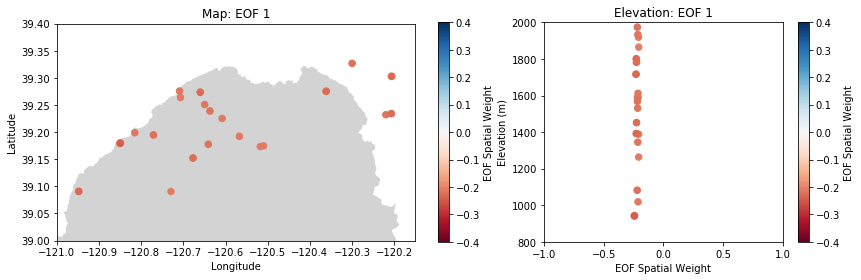

In [9]:
i = 0 # select the first EOF

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4), gridspec_kw={'width_ratios': [3, 2]}, tight_layout=True)

# plot the watershed shapefile
watershed.plot(linestyle='-', edgecolor='lightgrey', color='lightgrey', ax=ax[0])

# Make a scatter plot
points = ax[0].scatter(SITE_LONS,SITE_LATS,     # use longitude and latitude as the x and y values
                       c=V[i,:],                # set the color map value from V
                       s=np.abs(V[i,:]*200),    # also set the size of the marker from abs(V) (x200 to make it easier to see)
                       marker='o',cmap='RdBu',  # select marker type and color map
                       vmin=-0.4,vmax=0.4)      # set min and max for color map values

# Add labels and format the scatterplot
plt.colorbar(points, label='EOF Spatial Weight', ax=ax[0]) # add a colorbar and label it
ax[0].set_title('Map: EOF {}'.format(i+1)) # add a title
ax[0].set_xlabel('Longitude') # x axis label
ax[0].set_ylabel('Latitude'); # y axis label

# set up axes limits to zoom in to our points
ax[0].set_xlim((-121, -120.15))
ax[0].set_ylim((39.0,39.4))

# Plot EOF value versus elevation
points = ax[1].scatter(V[i,:],SITE_ELEVS,     # use longitude and latitude as the x and y values
                       c=V[i,:],                # set the color map value from V
                       s=np.abs(V[i,:]*200),    # also set the size of the marker from abs(V) (x200 to make it easier to see)
                       marker='o',cmap='RdBu',  # select marker type and color map
                       vmin=-0.4,vmax=0.4)      # set min and max for color map values

# Add labels and format the scatterplot
plt.colorbar(points, label='EOF Spatial Weight', ax=ax[1]) # add a colorbar and label it
ax[1].set_title('Elevation: EOF {}'.format(i+1)) # add a title
ax[1].set_xlabel('EOF Spatial Weight') # x axis label
ax[1].set_ylabel('Elevation (m)'); # y axis label

# set up axes limits to zoom in to our points
ax[1].set_xlim((-1, 1))
ax[1].set_ylim((800,2000));

Plot the first leading pattern of temporal weights (PC).

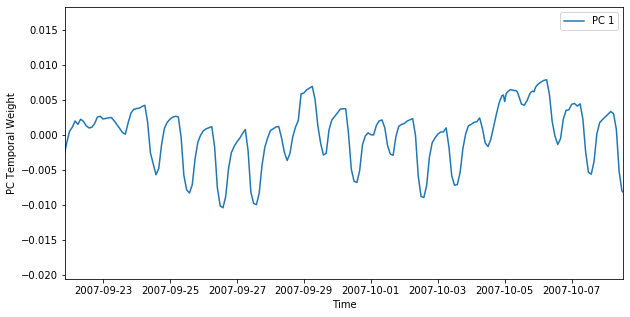

In [10]:
i = 0 # select the first PC

plt.figure(figsize=(10,5))
plt.plot(dates,U[:,i],
         label='PC {}'.format(i+1))
plt.xlim((dates[100], dates[500]))
plt.legend()
plt.ylabel('PC Temporal Weight')
plt.xlabel('Time');

**The rest of the problem is up to you to complete...**